In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = int(1e6)
ts = 1/fs
t = np.arange(0, 1, ts)
passo_f = 1
f = np.arange(-fs/2, fs/2, passo_f)

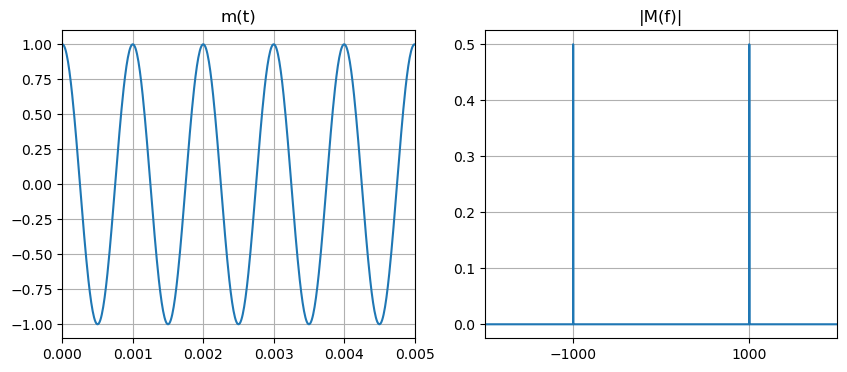

In [25]:
fm = int(1e3)
Am = 1
m_t = Am * np.cos(2*np.pi*fm*t)
M_f = np.fft.fftshift(np.fft.fft(m_t) / len(m_t))

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(t, m_t)
plt.title("m(t)")
plt.grid()
plt.xlim(0, 5*(1/fm))

plt.subplot(122)
plt.plot(f, np.abs(M_f))
plt.title("|M(f)|")
plt.grid()
plt.xlim(-2*fm, 2*fm)
plt.xticks([-fm, fm])

plt.show()

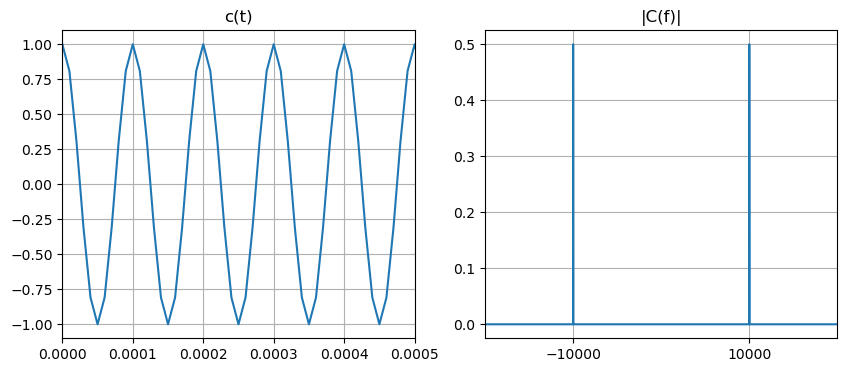

In [26]:
fc = int(10e3)
Ac = 1
c_t = Ac * np.cos(2*np.pi*fc*t)
C_f = np.fft.fftshift(np.fft.fft(c_t) / len(c_t))

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(t, c_t)
plt.title("c(t)")
plt.grid()
plt.xlim(0, 5*(1/fc))

plt.subplot(122)
plt.plot(f, np.abs(C_f))
plt.title("|C(f)|")
plt.grid()
plt.xlim(-2*fc, 2*fc)
plt.xticks([-fc, fc])

plt.show()

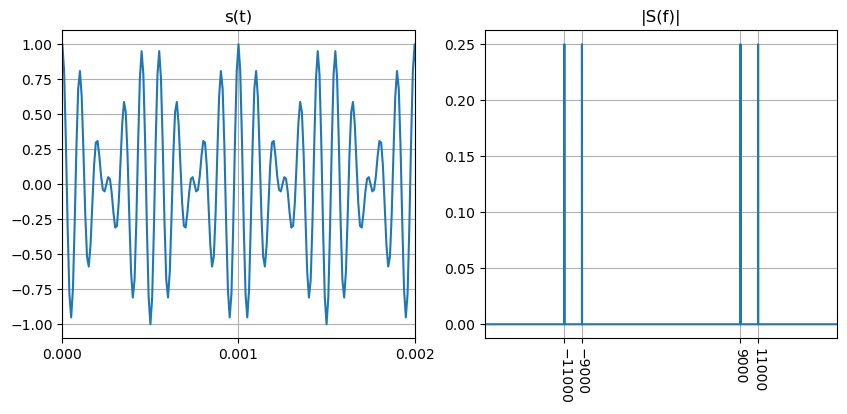

In [31]:
s_t = m_t * c_t
S_f = np.fft.fftshift(np.fft.fft(s_t) / len(s_t))

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(t, s_t)
plt.title("s(t)")
plt.grid()
plt.xlim(0, 2*(1/fm))
plt.xticks([0, 1/fm, 2/fm])

plt.subplot(122)
plt.plot(f, np.abs(S_f))
plt.title("|S(f)|")
plt.grid()
plt.xlim(-2*fc, 2*fc)
plt.xticks([-fc-fm, -fc+fm, fc-fm, fc+fm], rotation=-90)

plt.show()

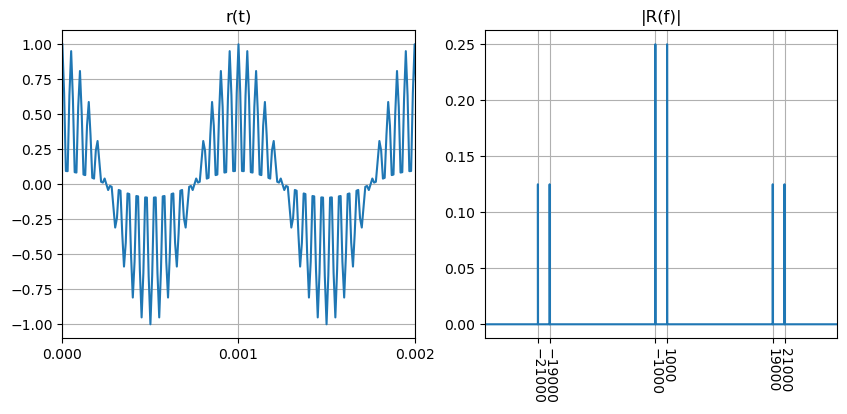

In [35]:
r_t = s_t * c_t
R_f = np.fft.fftshift(np.fft.fft(r_t) / len(r_t))

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(t, r_t)
plt.title("r(t)")
plt.grid()
plt.xlim(0, 2*(1/fm)) 
plt.xticks([0, 1/fm, 2/fm]) 

plt.subplot(122)
plt.plot(f, np.abs(R_f))
plt.title("|R(f)|")
plt.grid()
plt.xlim(-3*fc, 3*fc)
plt.xticks([-2*fc-fm, -2*fc+fm, -fm, +fm, 2*fc -fm, 2*fc+fm], rotation=-90)


plt.show()

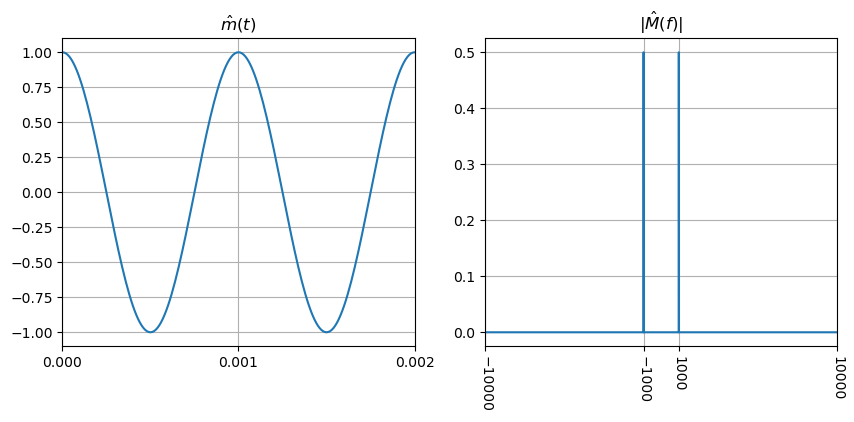

In [47]:
f_cut = int(2e3)

filtro_pb = np.concatenate((np.zeros(int(fs/2 - f_cut)), np.ones(f_cut * 2), np.zeros(int(fs/2 - f_cut))))

M_f_hat = 2 * R_f * filtro_pb
m_t_hat = np.fft.ifft(np.fft.ifftshift(M_f_hat)) * len(M_f_hat)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(t, m_t_hat)
plt.title("$\hat{m}(t)$")
plt.grid()
plt.xlim(0, 2*(1/fm))
plt.xticks([0, 1/fm, 2/fm])

plt.subplot(122)
plt.plot(f, np.real(M_f_hat))
plt.title("$|\hat{M}(f)|$")
plt.grid()
plt.xlim(-fc, fc)
plt.xticks([-fc, -fm, fm, fc], rotation=-90)

plt.show()